<a href="https://colab.research.google.com/github/vajiha110/FMML_IIITH_PROJECTS/blob/main/AIML_Module_4_Lab_2(1)_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [78]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [79]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

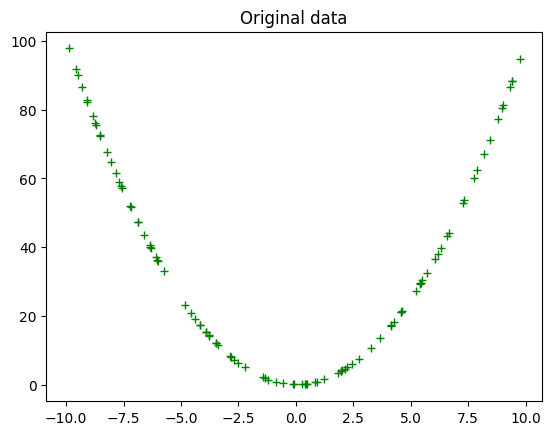

In [80]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [81]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


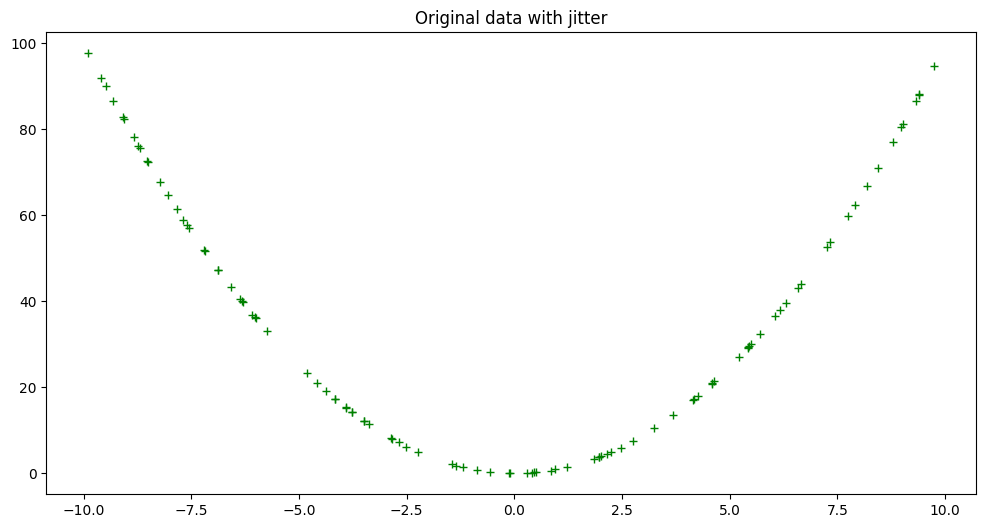

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [83]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

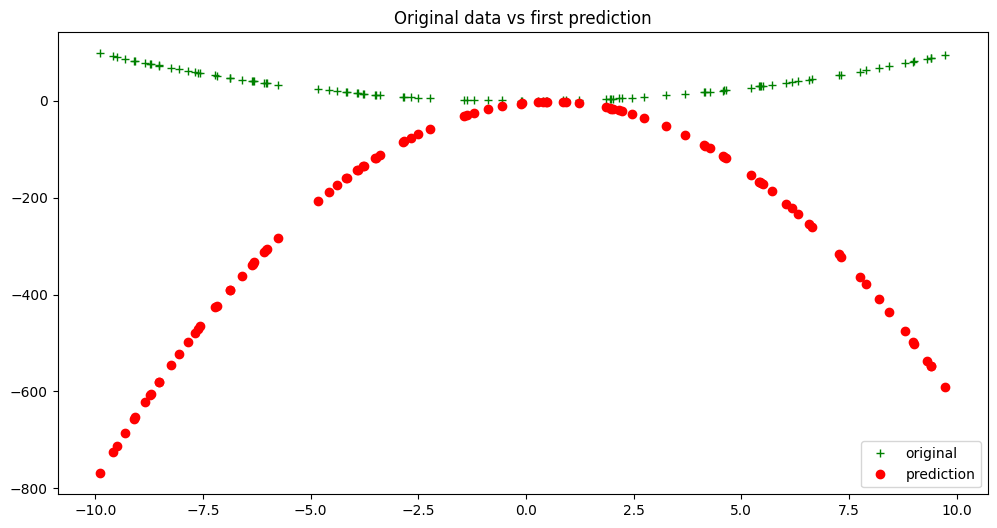

In [84]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [85]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [86]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [87]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


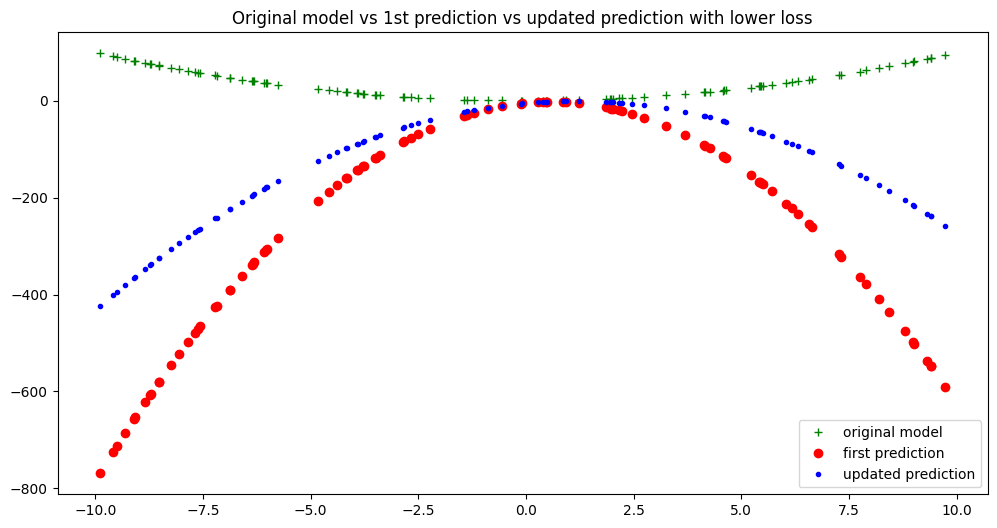

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [89]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [90]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [91]:
GD = gradient_descent(30000, 0.0003)


[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

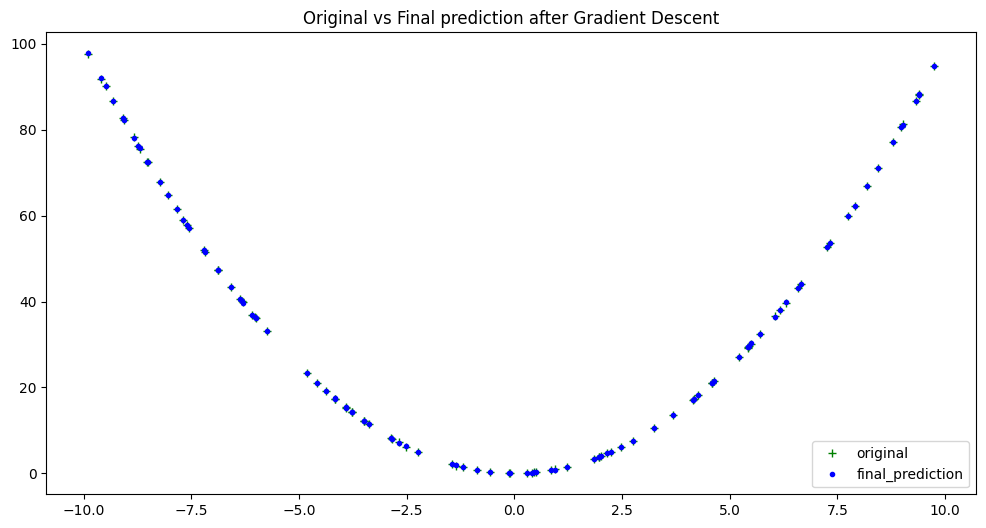

In [92]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [93]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


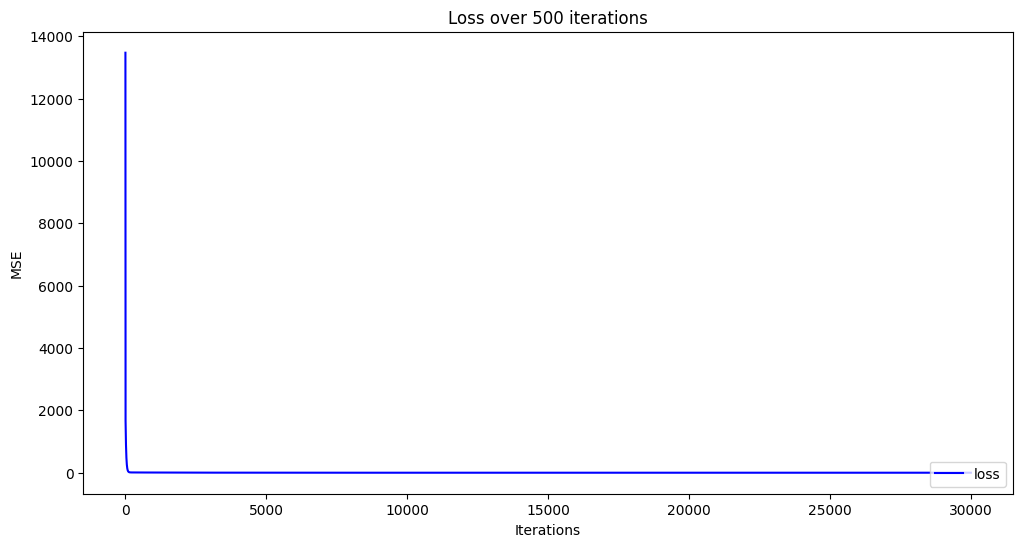

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



*1*.Change the coefficients array and try a different polynomial instead of our  x^2 .

Here Iam trying 3rd degree polynomial

In [95]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [96]:
def eval_3rd_degree(coeffs, x):
    """
    Function to return the output of evaluating a third degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x * x)
    b = coeffs[1] * (x * x)
    c = coeffs[2] * (x)
    d = coeffs[3]
    y = a + b + c + d
    return y

hundred_xs = np.random.uniform(-1, 1, 100)
coeffs = [1, 0, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_3rd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

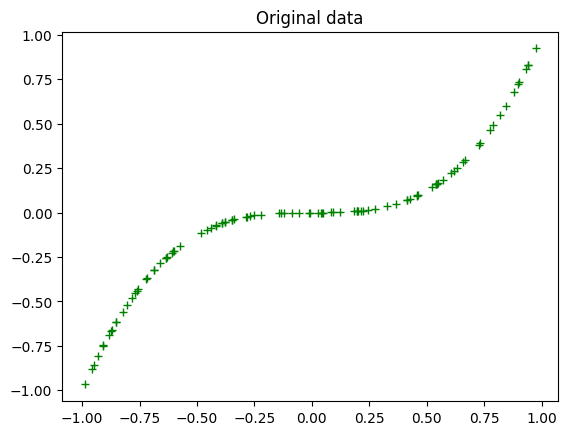

In [97]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [98]:
def eval_3rd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a third degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, c, d for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the third degree polynomial.

    """

    a = coeffs[0] * (x * x * x)
    b = coeffs[1] * (x * x)
    c = coeffs[2] * (x)
    d = coeffs[3]
    y = a + b + c + d

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_3rd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


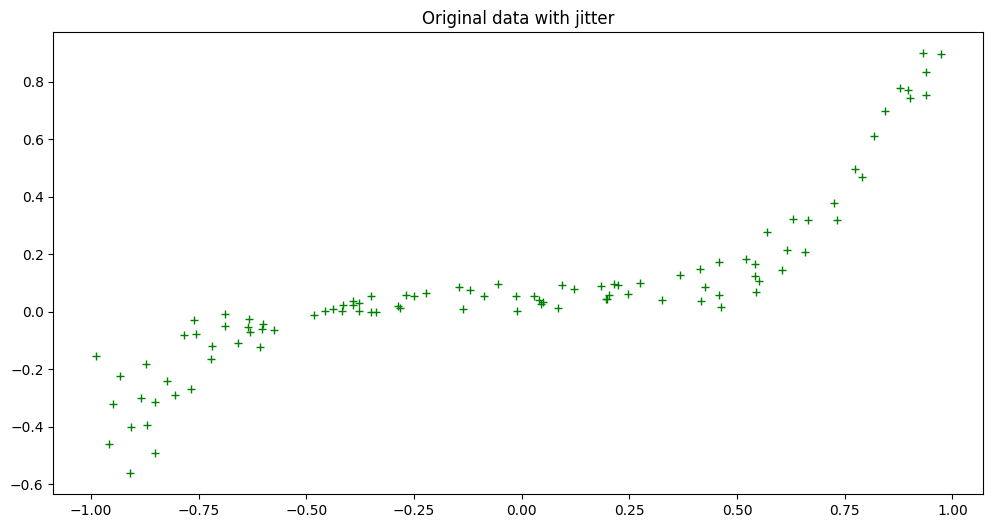

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [100]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

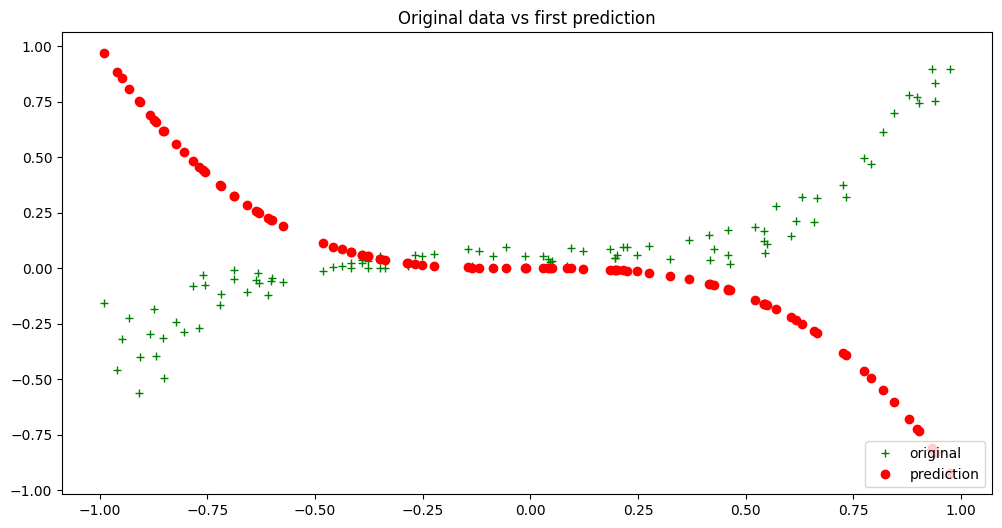

In [101]:
rand_coeffs = (random.randrange(-1, 1), random.randrange(-1, 1), random.randrange(-1, 1), random.randrange(-1, 1))
y_bar = eval_3rd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [102]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

0.43892538724736613

In [103]:
def calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a third degree polynomial.

    Args:
        coeffs: a,b,c,d for a 3rd degree polynomial [ y = ax^3 + bx^2 + cx+d ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 3rd degree polynomial, as a tuple of its parts for a,b,c,d respectively.

    """

    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_3rd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_cubed = x**3
        x_squared = x ** 2
        partial_a = x_cubed * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_squared * (y - y_bar)
        b_s.append(partial_b)
        partial_c =x* (y - y_bar)
        c_s.append(partial_c)
        partial_d =(y - y_bar)
        d_s.append(partial_d)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)

    return (gradient_a, gradient_b, gradient_c,gradient_d)   # return calculated gradients as a a tuple of its 4 parts

In [104]:
calc_grad = calc_gradient_3rd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.1
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
new_model_coeffs = (a_new, b_new, c_new, d_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_3rd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-0.9496718809201177, 0.0015830498671800027, 0.07058932800654076, 0.00700619067532602)
Now have smaller model loss: 0.36687151803070184 vs 0.43892538724736613


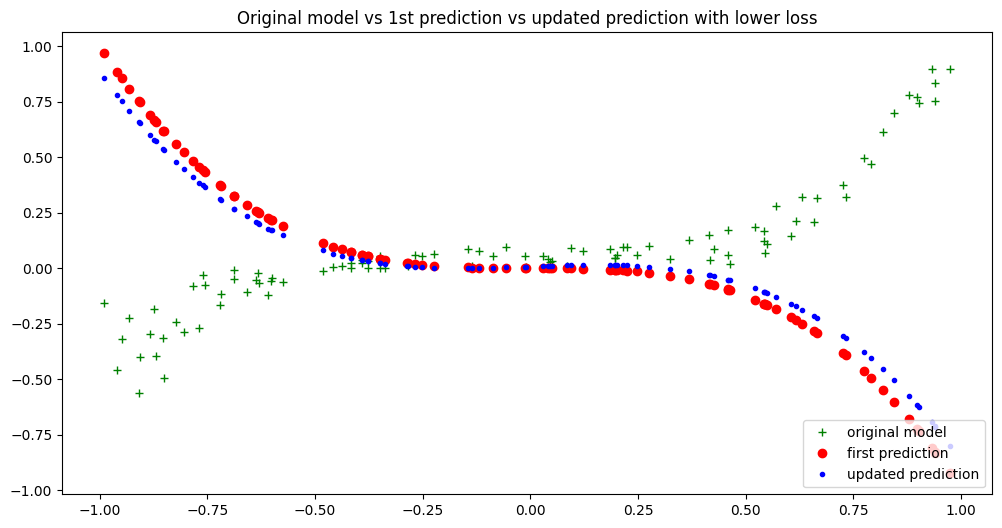

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [106]:
def calc_gradient_3rd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b,c,d for a 2nd degree polynomial [ y = ax^3 + bx^2 + cx + d ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 3rd degree polynomial, as a tuple of its parts for a,b,c,d respectively.

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []

    y_bars = eval_3rd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_cubed = x**3
        x_squared = x ** 2
        partial_a = x_cubed * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_squared * (y - y_bar)
        b_s.append(partial_b)
        partial_c =x* (y - y_bar)
        c_s.append(partial_c)
        partial_d =(y - y_bar)
        d_s.append(partial_d)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)



    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[2] - lr * gradient_d


    new_model_coeffs = (a_new, b_new, c_new, d_new)

    # update with these new coeffs:
    new_y_bar = eval_3rd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [107]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a third degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_3rd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [108]:
GD = gradient_descent(30000,0.3)

[0.24448249748907588, 0.17299258623040867, 0.12328691153050492, 0.13655339400946423, 0.12590568605748767, 0.14127147742755602, 0.1385863097259939, 0.1458473171237734, 0.1437641216761939, 0.14545595850236118, 0.14296095641592838, 0.14197933313109412, 0.1392945275069358, 0.13728579020589696, 0.13465324788343586, 0.13236386018997218, 0.1298841102601373, 0.1275978603791932, 0.12528023630377072, 0.12307958475134088, 0.12089795216806375, 0.11879066762829883, 0.11671365135221054, 0.11468656181159825, 0.11268908805223252, 0.1107278024393571, 0.1087933021917098, 0.10688768941565545, 0.10500672986084739, 0.10315117348176321, 0.10131927209923748, 0.09951144790843365, 0.09772713247769146, 0.09596669212084757, 0.0942300835635034, 0.09251764787873044, 0.09082953600461799, 0.08916603670787865, 0.08752733100471566, 0.08591362880810609, 0.08432506495037043, 0.08276175757610256, 0.08122376548308742, 0.07971111456291252, 0.07822378171631697, 0.07676170815562113, 0.07532479471530486, 0.07391290958669122, 

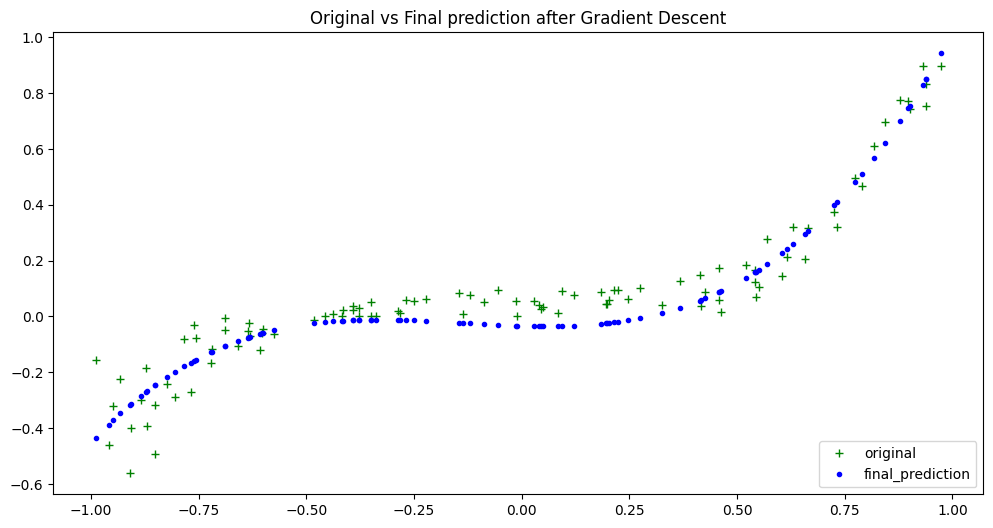

In [109]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [110]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.7825152136689122, 0.3158027055505622, -0.04744656256258393, -0.03293549267695322)
Original Coefficients: [1, 0, 0, 0]


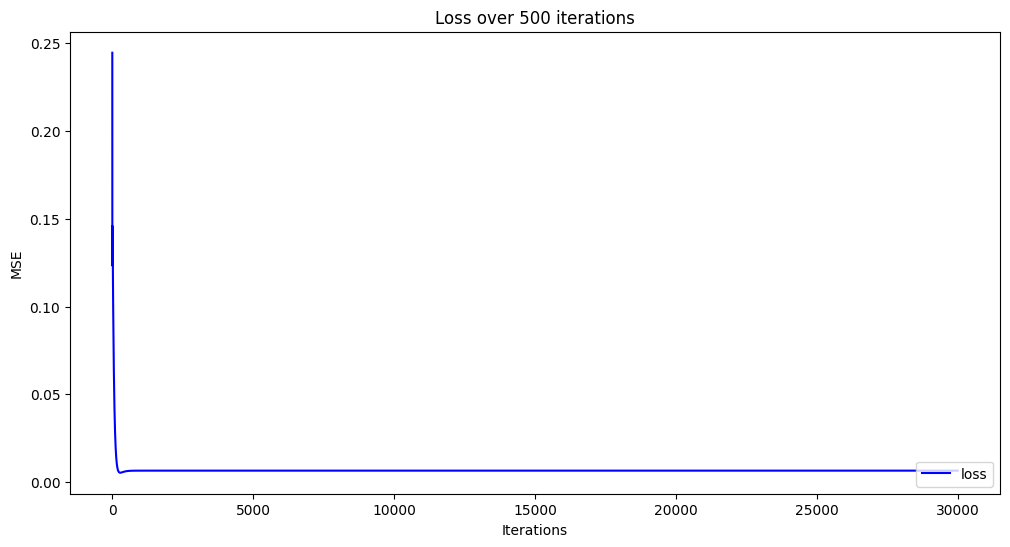

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs

3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?

In [112]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

In [113]:
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth-degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth-degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0, 0, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

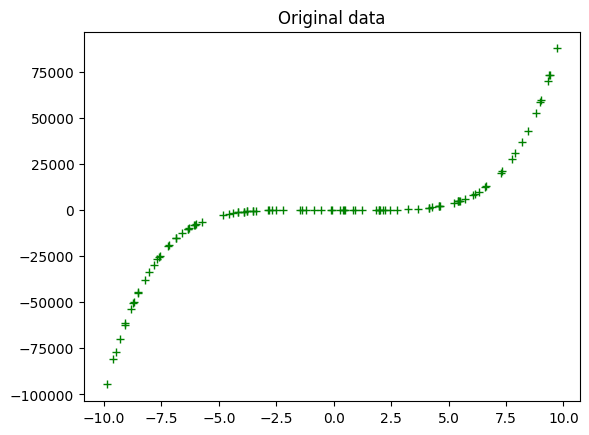

In [114]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [115]:
def eval_5th_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a fifth-degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the fifth-degree polynomial.
    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.uniform(interval_min, interval_max)  # Generate a random number in the specified interval

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y = eval_5th_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

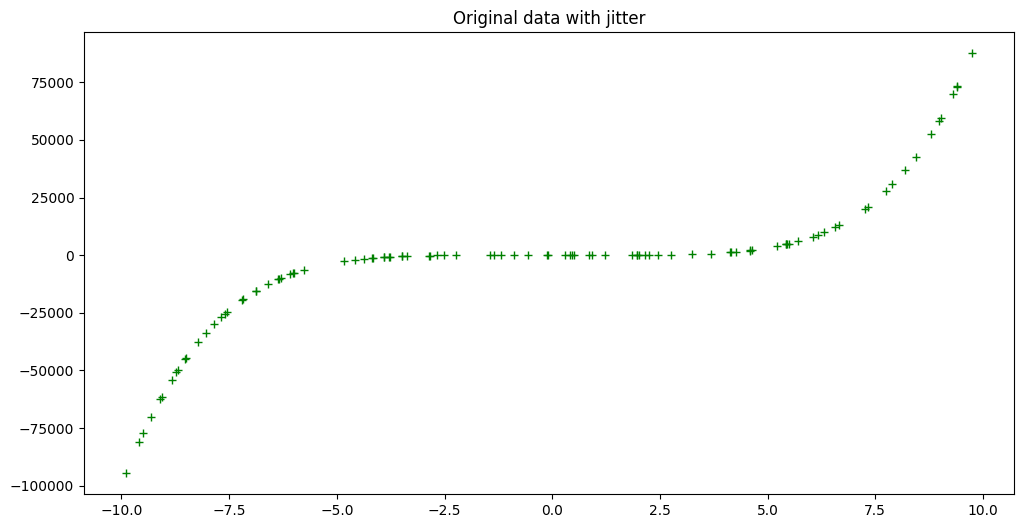

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [117]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

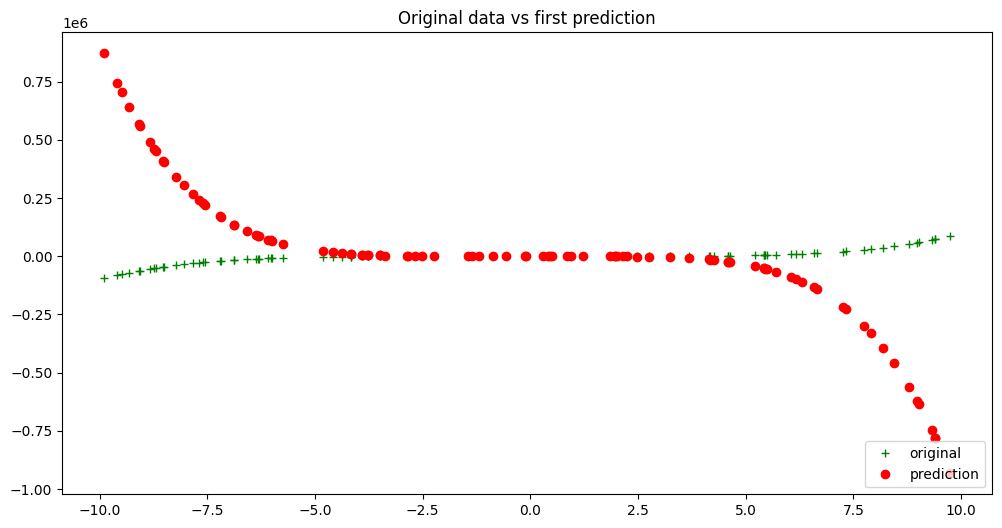

In [118]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10),random.randrange(-10, 10),random.randrange(-10, 10))
y_bar = eval_5th_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [119]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

108670280613.02211

In [120]:
def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the fifth-degree polynomial, as a tuple of its parts for a, b, c, d, e, f respectively.
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_5 = x ** 5
        x_4 = x ** 4
        x_3 = x ** 3
        x_2 = x ** 2
        x_1 = x
        partial_a = x_5 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3 * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2 * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_1 * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    return (gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f)

In [121]:
calc_grad = calc_gradient_5th_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]
d_new = rand_coeffs[3] - lr * calc_grad[3]
e_new = rand_coeffs[4] - lr * calc_grad[4]
f_new = rand_coeffs[5] - lr * calc_grad[5]

new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_5th_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (2003059.975839757, -17801.873928917463, 24958.54657513602, -235.30742968206857, 325.41569375076955, -10.074806069362587)
Now have smaller model loss: 3.7249157089872367e+21 vs 108670280613.02211


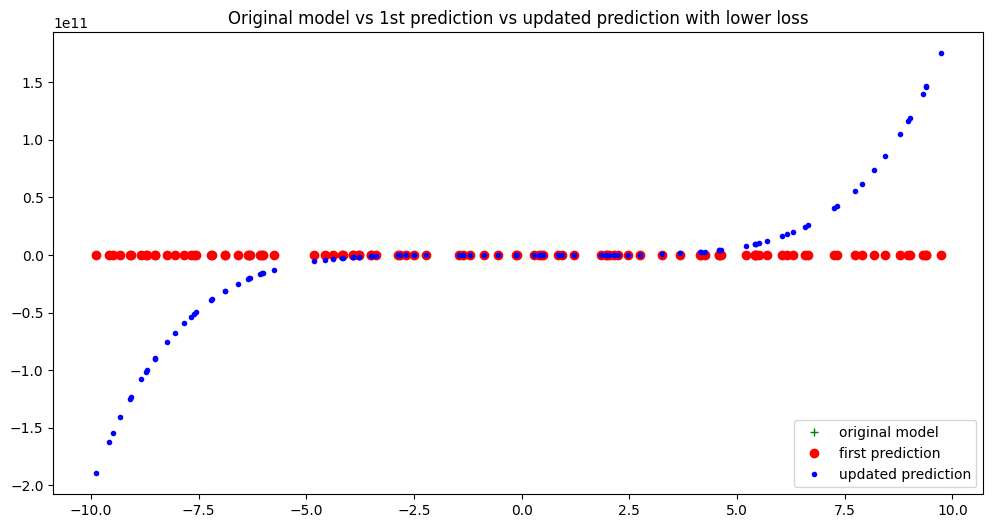

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [123]:
def calc_gradient_5th_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a fifth-degree polynomial.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the fifth-degree polynomial, as a tuple of its parts for a, b, c, d, e, f respectively.
    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_5 = x ** 5
        x_4 = x ** 4
        x_3 = x ** 3
        x_2 = x ** 2
        x_1 = x
        partial_a = x_5 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_4 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_3 * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_2 * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_1 * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e
    f_new = coeffs[5] - lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)


     # update with these new coeffs:
    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


In [124]:
def gradient_descent(epochs, lr, init_coeffs):
    """
    Perform gradient descent for a fifth-degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updating loss.
        lr: specified learning rate
        init_coeffs: initial coefficients

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    """
    losses = []
    rand_coeffs_to_test = init_coeffs
    for i in range(epochs):
        loss = calc_gradient_5th_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)


In [125]:
# List of different initializations
initializations = [
    [1, -3, 2, 0, -1, -2],
    [1, 3, 2, 0, -1, -2,],
]

# Perform gradient descent for each initialization
for init_coeffs in initializations:
    GD = gradient_descent(30000, 0.001,init_coeffs)



<ipython-input-117-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-117-3e15a3826a00>:12: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-123-1a5fc392b63a>:27: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_5 * (y - y_bar)
<ipython-input-123-1a5fc392b63a>:29: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x_4 * (y - y_bar)
<ipython-input-123-1a5fc392b63a>:43: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-123-1a5fc392b63a>:44: RuntimeWarning: overflow encountered in double_scalars
  gradient_c = (-2 / n) * sum(c_s)


[1.8460408959815668e+19, 6.344341190204851e+31, 2.1865390566608543e+44, 7.53577858839408e+56, 2.597161883014842e+69, 8.950966071340904e+81, 3.0848979470348274e+94, 1.0631919803706791e+107, 3.664228789840634e+119, 1.2628549567892527e+132, 4.352355525148712e+144, 1.5000137993245215e+157, 5.16970956339121e+169, 1.7817100737242282e+182, 6.140559247835204e+194, 2.1163077221289e+207, 7.29373041441031e+219, 2.5137413997893964e+232, 8.663462269637532e+244, 2.985811448374179e+257, 1.0290423998828485e+270, 3.5465342640214473e+282, 1.2222922289023339e+295, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

<ipython-input-113-1734dfd78b4a>:19: RuntimeWarning: invalid value encountered in add
  y = a + b + c + d + e + f


[2.2658055572067566e+18, 7.63005507065507e+30, 2.629644575187445e+43, 9.06291575969325e+55, 3.1234807503897575e+68, 1.0764893172069303e+81, 3.7100572811791454e+93, 1.2786494774833402e+106, 4.406790414159847e+118, 1.5187744644883842e+131, 5.234367095313166e+143, 1.803993912797758e+156, 6.217359191955291e+168, 2.1427763723349375e+181, 7.38495306460316e+193, 2.545180751034847e+206, 8.77181614936425e+218, 3.0231549773807784e+231, 1.041912628084957e+244, 3.590890750508054e+256, 1.2375794317594999e+269, 4.2652449108831034e+281, 1.4699916371387734e+294, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

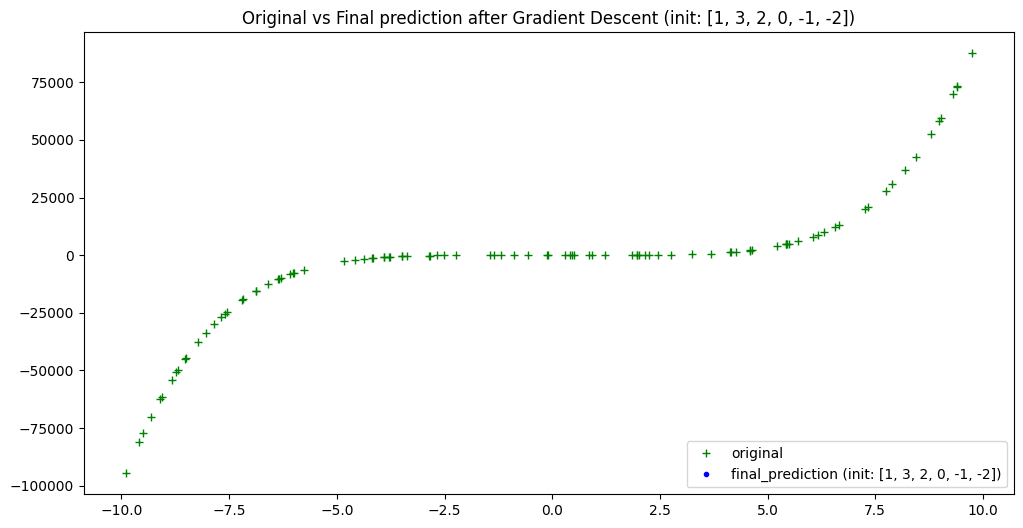

In [126]:
    plt.figure(figsize=(12, 6))
    plt.plot(xs, ys, 'g+', label='original')
    plt.plot(xs, GD[2], 'b.', label=f'final_prediction (init: {init_coeffs})')
    plt.title(f'Original vs Final prediction after Gradient Descent (init: {init_coeffs})')
    plt.legend(loc="lower right")
    plt.show()

In [127]:
  print(f"Final Coefficients predicted (init: {init_coeffs}): {GD[1]}")
  print(f"Original Coefficients: {init_coeffs}")




Final Coefficients predicted (init: [1, 3, 2, 0, -1, -2]): (nan, nan, nan, nan, nan, nan)
Original Coefficients: [1, 3, 2, 0, -1, -2]


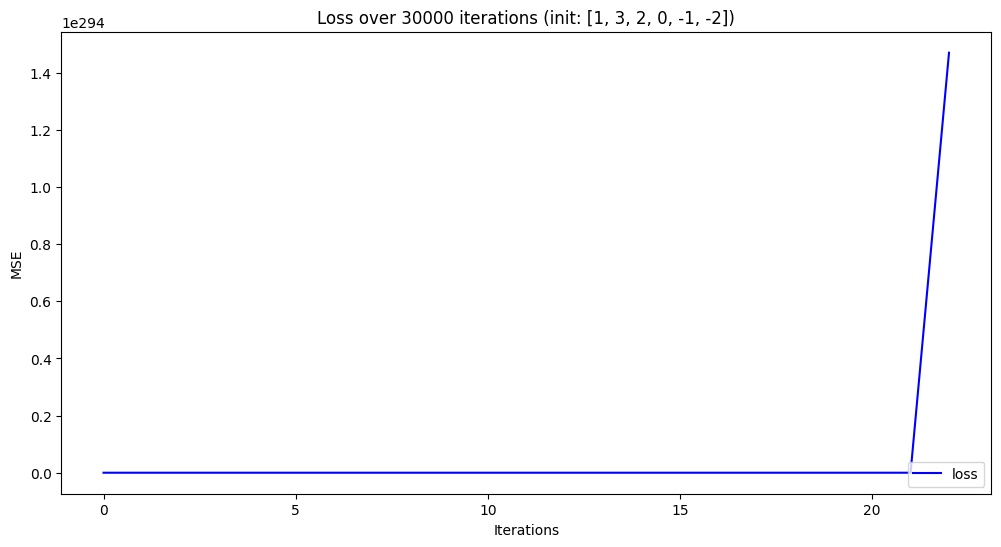

In [128]:
    plt.figure(figsize=(12, 6))
    plt.plot(GD[3], 'b-', label='loss')
    plt.title(f'Loss over 30000 iterations (init: {init_coeffs})')
    plt.legend(loc="lower right")
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.show()

here when we are doing fifth degree polynomial even by using different lr values we are not getting the correct ouput and also loss is not zero at the end even though the loss reduced

4.Can you modify the algorithm to find a maxima of a function, instead of a minima?

In [129]:


# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

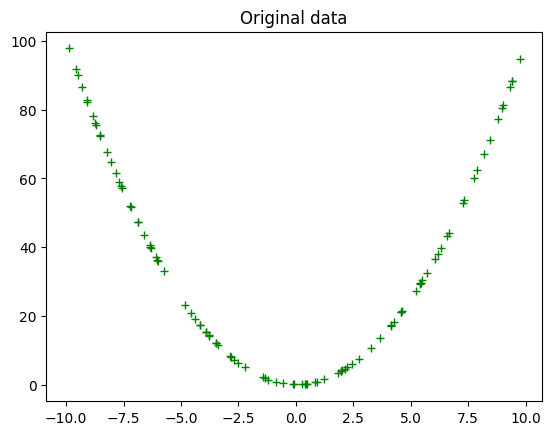

In [130]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.
    """
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

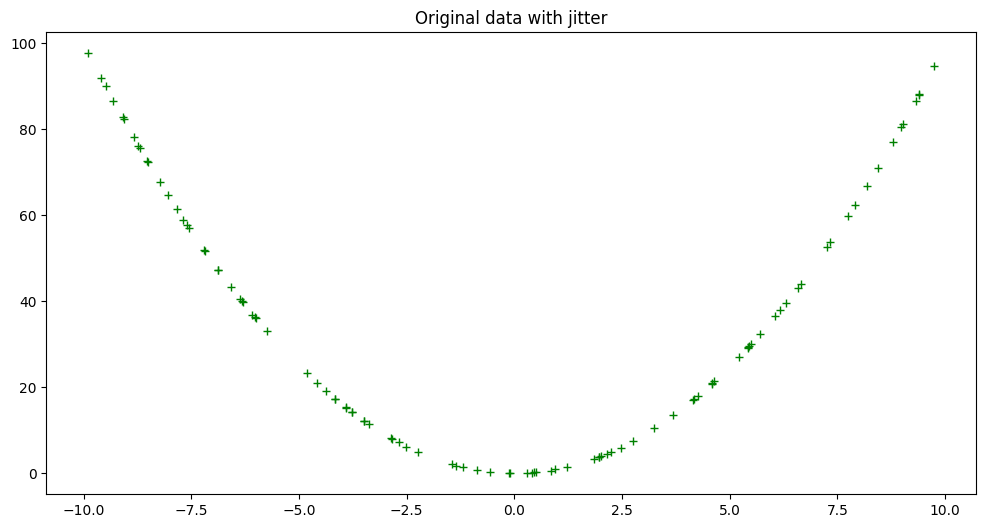

In [131]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.
    """
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max

    while interval_min > jit_val:
        jit_val = random.random() * interval_max

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

In [132]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: Training data labels.
        y_bar: Prediction labels.

    Returns:
        Calculated MSE loss.
    """
    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

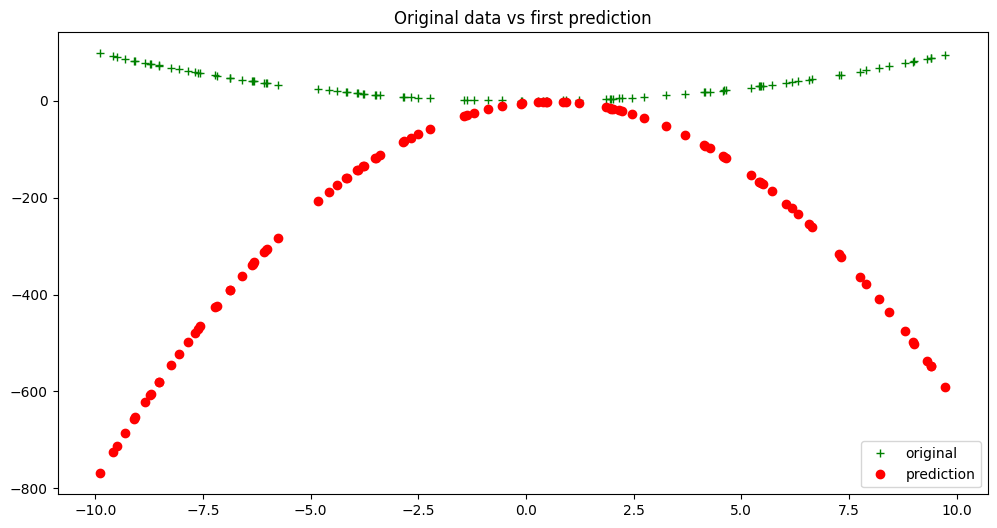

In [133]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, y_bar, 'ro', label='prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [134]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

In [135]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    Calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a, b, and c for a 2nd degree polynomial [y = ax^2 + bx + c].
        inputs_x: x input datapoints.
        outputs_y: actual y output points.

    Returns:
        Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a, b, c respectively.
    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (2 / n) * sum(a_s)
    gradient_b = (2 / n) * sum(b_s)
    gradient_c = (2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)


In [136]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have a larger model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-10.512792514759642, 8.120850943104816, -5.058594592966406)
Now have a larger model loss: 296763.16271536605 vs 146807.86204726336


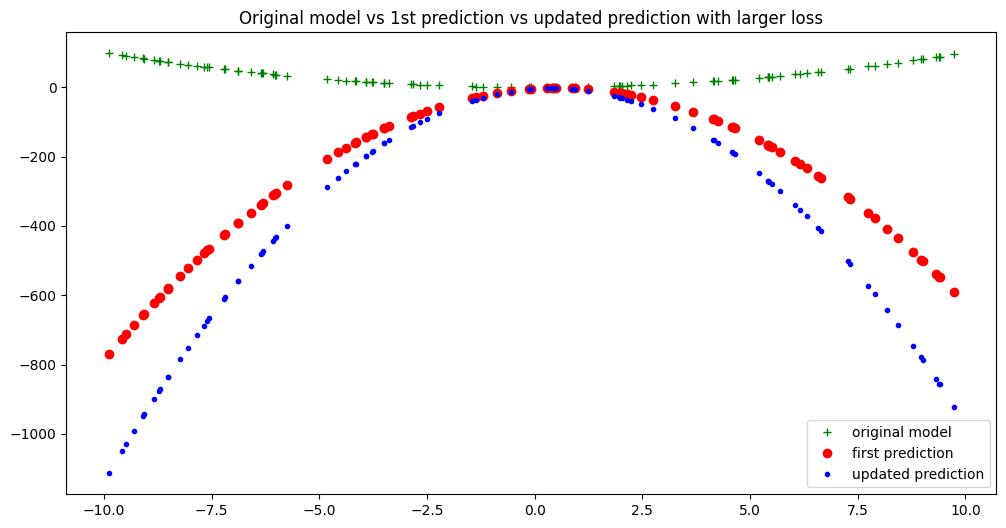

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='original model')
plt.plot(xs, y_bar, 'ro', label='first prediction')
plt.plot(xs, new_y_bar, 'b.', label='updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with larger loss')
plt.legend(loc="lower right")
plt.show()

In [138]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a second degree polynomial and performs parameter update for gradient descent.

    Args:
        coeffs: a, b, and c for a 2nd degree polynomial [y = ax^2 + bx + c].
        inputs_x: x input datapoints.
        outputs_y: actual y output points.
        lr: learning rate.

    Returns:
        Calculated loss, updated coefficients, and new predictions.
    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)
    gradient_a = (2 / n) * sum(a_s)
    gradient_b = (2 / n) * sum(b_s)
    gradient_c = (2 / n) * sum(c_s)

    a_new = coeffs[0] + lr * gradient_a
    b_new = coeffs[1] + lr * gradient_b
    c_new = coeffs[2] + lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [139]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updating loss.
        lr: specified learning rate.

    Returns:
        Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates).
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses

[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

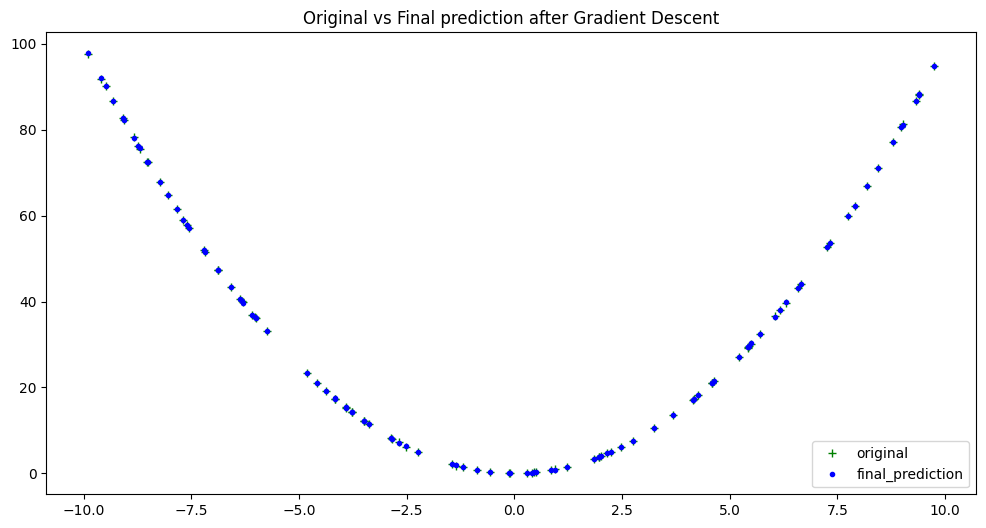

In [140]:
GD = gradient_descent(30000, 0.0003)
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label='original')
plt.plot(xs, GD[2], 'b.', label='final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

In [141]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


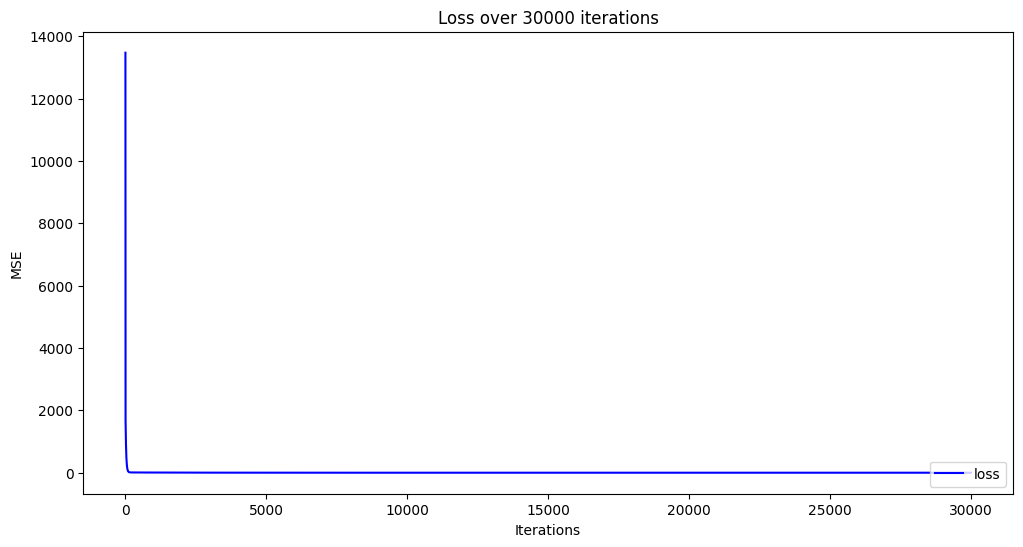

In [142]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label='loss')
plt.title('Loss over 30000 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()